In [ ]:
!pip install pandas
!pip install pandas pyreadstat
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, make_scorer, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
drive.mount('/content/drive')

sav_file_path1 = '/content/drive/My Drive/FYP/ncds0123.sav'
sav_file_path2 = '/content/drive/My Drive/FYP/ncds4.sav'
tab_file_path1 = '/content/drive/My Drive/FYP/ncds0123.tab'
tab_file_path2 = '/content/drive/My Drive/FYP/ncds4.tab'
stata_file_path1 = '/content/drive/My Drive/FYP/ncds0123.dta'
stata_file_path2 = '/content/drive/My Drive/FYP/ncds4.dta'
output_csv_path1 = '/content/drive/My Drive/FYP/sav0123.csv'
output_csv_path2 = '/content/drive/My Drive/FYP/sav4.csv'
csv_file_path1 = '/content/drive/My Drive/FYP/sav0123.csv'
csv_file_path2 = '/content/drive/My Drive/FYP/sav4.csv'


#reads all the data files proparly
sav_data1 = pd.read_spss(sav_file_path1)
tab_data1 = pd.read_csv(tab_file_path1, sep='\t', low_memory=False)
stata_data1 = pd.read_stata(stata_file_path1, convert_categoricals=False)
sav_data2 = pd.read_spss(sav_file_path2)
tab_data2 = pd.read_csv(tab_file_path2, sep='\t', low_memory=False)
stata_data2 = pd.read_stata(stata_file_path2, convert_categoricals=False)
sav_data1.to_csv(output_csv_path1, index=False)
sav_data2.to_csv(output_csv_path2, index=False)
csv_sav_data1 = pd.read_csv(csv_file_path1, low_memory=False)
csv_sav_data2 = pd.read_csv(csv_file_path2, low_memory=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.3 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
display(sav_data1)
combined_original_sav_data = pd.merge(sav_data1, sav_data2, on='ncdsid')
display(combined_original_sav_data)

#shows the datatypes of original sav data
data_types = combined_original_sav_data.dtypes
data_type_counts = data_types.value_counts()
print(data_type_counts)
for i in data_type_counts:
  print(i)

,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,n1849,dvht07,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16
0,N10001N,Female,South West,South West,South West,South West,23.0,Married,2yrs under 3,Farm workers,...,NaN,1.219000,1.473000,1.599999,110.347992,98.192993,105.056000,25.854996,37.648987,56.019989
1,N10002P,Male,South West,South,South,South,34.0,Married,5yrs under 10,Skilled workers,...,NaN,1.346000,NaN,NaN,90.865997,NaN,NaN,26.308990,NaN,NaN
2,N10003Q,Male,North Midlands,North Midlands,North Midlands,North Midlands,34.0,Married,4 to 6mths,Skilled workers,...,NaN,1.320999,1.499000,1.879999,87.959991,96.404999,89.382996,24.493988,38.101990,66.679993
3,N10004R,Female,North,North,North,North,26.0,Married,7 to 8mths,Skilled workers,...,NaN,1.294999,1.511000,1.629999,105.161987,111.588989,132.054993,28.122986,45.813995,72.799988
4,N10005S,Female,Wales,Wales,Wales,Wales,25.0,Married,1yr under 2,Unskilled worker,...,NaN,1.346000,NaN,NaN,129.382996,NaN,NaN,37.648987,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18553,N28554F,Male,NaN,NaN,South East,South East,NaN,NaN,NaN,NaN,...,NaN,NaN,1.422000,1.660000,NaN,98.783997,101.503998,NaN,34.019989,55.489990
18554,N28555G,Male,East,East,East,East,30.0,Married,2yrs under 3,Skilled workers,...,NaN,1.193999,1.396999,1.719999,100.489990,95.188995,100.237991,22.679993,31.297989,59.879990
18555,N28556H,Female,North,North,North,North,31.0,Married,4yrs under 5,Skilled workers,...,NaN,1.143000,1.372000,1.589999,86.908997,80.173996,80.867996,17.689987,25.401993,42.639999
18556,N28557J,Female,South,South,South,NaN,28.0,Married,3yrs under 4,Shop assistants,...,NaN,1.245000,1.511000,NaN,85.038986,95.015991,NaN,20.865997,39.009995,NaN


,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,icdcat15,icdcat16,icdcat17,icdcat18,icdcat19,malaise,mal,dvht23,dvrwt23,dvwt23
0,N10001N,Female,South West,South West,South West,South West,23.0,Married,2yrs under 3,Farm workers,...,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,NORMAL 0-7,1.0,1.625999,102.806992,59.420990
1,N10002P,Male,South West,South,South,South,34.0,Married,5yrs under 10,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,1.0,1.905000,89.670990,73.482986
2,N10004R,Female,North,North,North,North,26.0,Married,7 to 8mths,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.650999,128.806000,76.203995
3,N10007U,Female,NaN,NaN,NaN,North West,NaN,NaN,NaN,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,NORMAL 0-7,1.0,1.625999,90.250000,52.163986
4,N10009W,Male,NaN,South East,South East,NaN,NaN,NaN,NaN,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.726999,96.950989,66.678986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,N28553E,Female,Wales,Wales,Wales,Wales,20.0,Married,1yr under 2,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,6.0,1.599999,129.377991,73.028992
12533,N28555G,Male,East,East,East,East,30.0,Married,2yrs under 3,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.778000,96.436996,69.853989
12534,N28556H,Female,North,North,North,North,31.0,Married,4yrs under 5,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,DEPRESSED 8-24,9.0,1.625999,71.414993,41.276993
12535,N28557J,Female,South,South,South,NaN,28.0,Married,3yrs under 4,Shop assistants,...,PRESENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,5.0,1.676000,125.881989,76.203995


category    157
float64     153
category     87
category     84
category     76
           ... 
category      1
category      1
category      1
category      1
category      1
Name: count, Length: 1748, dtype: int64
157
153
87
84
76
46
43
39
32
24
22
19
18
16
15
15
14
14
14
13
13
13
12
11
11
10
10
9
9
9
9
9
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

In [ ]:
display(csv_sav_data1)
combined_sav_data = pd.merge(csv_sav_data1, csv_sav_data2, on='ncdsid')
display(combined_sav_data)


#shows the datatypes of csv sav data
data_types = combined_sav_data.dtypes
data_type_counts = data_types.value_counts()
print(data_type_counts)
for i in data_type_counts:
  print(i)

,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,n1849,dvht07,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16
0,N10001N,Female,South West,South West,South West,South West,23.0,Married,2yrs under 3,Farm workers,...,NaN,1.219000,1.473000,1.599999,110.347992,98.192993,105.056000,25.854996,37.648987,56.019989
1,N10002P,Male,South West,South,South,South,34.0,Married,5yrs under 10,Skilled workers,...,NaN,1.346000,NaN,NaN,90.865997,NaN,NaN,26.308990,NaN,NaN
2,N10003Q,Male,North Midlands,North Midlands,North Midlands,North Midlands,34.0,Married,4 to 6mths,Skilled workers,...,NaN,1.320999,1.499000,1.879999,87.959991,96.404999,89.382996,24.493988,38.101990,66.679993
3,N10004R,Female,North,North,North,North,26.0,Married,7 to 8mths,Skilled workers,...,NaN,1.294999,1.511000,1.629999,105.161987,111.588989,132.054993,28.122986,45.813995,72.799988
4,N10005S,Female,Wales,Wales,Wales,Wales,25.0,Married,1yr under 2,Unskilled worker,...,NaN,1.346000,NaN,NaN,129.382996,NaN,NaN,37.648987,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18553,N28554F,Male,NaN,NaN,South East,South East,NaN,NaN,NaN,NaN,...,NaN,NaN,1.422000,1.660000,NaN,98.783997,101.503998,NaN,34.019989,55.489990
18554,N28555G,Male,East,East,East,East,30.0,Married,2yrs under 3,Skilled workers,...,NaN,1.193999,1.396999,1.719999,100.489990,95.188995,100.237991,22.679993,31.297989,59.879990
18555,N28556H,Female,North,North,North,North,31.0,Married,4yrs under 5,Skilled workers,...,NaN,1.143000,1.372000,1.589999,86.908997,80.173996,80.867996,17.689987,25.401993,42.639999
18556,N28557J,Female,South,South,South,NaN,28.0,Married,3yrs under 4,Shop assistants,...,NaN,1.245000,1.511000,NaN,85.038986,95.015991,NaN,20.865997,39.009995,NaN


,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,icdcat15,icdcat16,icdcat17,icdcat18,icdcat19,malaise,mal,dvht23,dvrwt23,dvwt23
0,N10001N,Female,South West,South West,South West,South West,23.0,Married,2yrs under 3,Farm workers,...,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,NORMAL 0-7,1.0,1.625999,102.806992,59.420990
1,N10002P,Male,South West,South,South,South,34.0,Married,5yrs under 10,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,1.0,1.905000,89.670990,73.482986
2,N10004R,Female,North,North,North,North,26.0,Married,7 to 8mths,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.650999,128.806000,76.203995
3,N10007U,Female,NaN,NaN,NaN,North West,NaN,NaN,NaN,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,NORMAL 0-7,1.0,1.625999,90.250000,52.163986
4,N10009W,Male,NaN,South East,South East,NaN,NaN,NaN,NaN,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.726999,96.950989,66.678986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,N28553E,Female,Wales,Wales,Wales,Wales,20.0,Married,1yr under 2,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,6.0,1.599999,129.377991,73.028992
12533,N28555G,Male,East,East,East,East,30.0,Married,2yrs under 3,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.778000,96.436996,69.853989
12534,N28556H,Female,North,North,North,North,31.0,Married,4yrs under 5,Skilled workers,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,DEPRESSED 8-24,9.0,1.625999,71.414993,41.276993
12535,N28557J,Female,South,South,South,NaN,28.0,Married,3yrs under 4,Shop assistants,...,PRESENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,5.0,1.676000,125.881989,76.203995


object     2633
float64     604
Name: count, dtype: int64
2633
604


In [ ]:
display(tab_data1)
combined_tab_data = pd.merge(tab_data1, tab_data2, on='ncdsid')
display(combined_tab_data)

#shows the datatypes of tab data
data_types = combined_tab_data.dtypes
data_type_counts = data_types.value_counts()
print(data_type_counts)
for i in data_type_counts:
  print(i)

,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,n1849,dvht07,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16
0,N10001N,2,9,9,9,9,23,4,2,12,...,-1,1.21899986267032,1.47299957275415,1.59999942779607,110.347991943347,98.1929931640604,105.055999755876,25.8549957275385,37.6489868164152,56.0199890136717
1,N10002P,1,9,8,8,8,34,4,5,1,...,-1,1.34599971771224,-1,-1,90.865997314449,-1,-1,26.3089904785155,-1,-1
2,N10003Q,1,4,4,4,4,34,4,10,1,...,-1,1.32099914550831,1.49899959564243,1.87999916076665,87.9599914550983,96.4049987792867,89.382995605487,24.4939880371087,38.1019897460905,66.6799926757659
3,N10004R,2,1,1,1,1,26,4,11,1,...,-1,1.29499912262003,1.51099967956562,1.62999916076665,105.16198730471,111.588989257796,132.054992675766,28.122985839843,45.8139953613169,72.7999877929584
4,N10005S,2,10,10,10,10,25,4,1,3,...,-1,1.34599971771224,-1,-1,129.382995605487,-1,-1,37.6489868164152,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18553,N28554F,1,-2,-1,7,7,,,,,...,-1,-1,1.42199993133516,1.65999984741198,-1,98.7839965820302,101.503997802743,-1,34.0199890136717,55.489990234385
18554,N28555G,1,6,6,6,6,30,4,2,1,...,-1,1.19399929046639,1.39699935913123,1.71999931335467,100.489990234385,95.1889953613169,100.237991333013,22.6799926757811,31.2979888915866,59.8799896240055
18555,N28556H,2,1,1,1,1,31,4,4,1,...,-1,1.1429996490474,1.37199974060052,1.58999919891328,86.9089965820302,80.1739959716964,80.8679962158208,17.689987182617,25.4019927978509,42.6399993896662
18556,N28557J,2,8,8,8,-1,28,4,3,8,...,,1.2449998855586,1.51099967956562,-1,85.0389862060357,95.0159912109282,-1,20.8659973144536,39.0099945068587,-1


,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,icdcat15,icdcat16,icdcat17,icdcat18,icdcat19,malaise,mal,dvht23,dvrwt23,dvwt23
0,N10001N,2,9,9,9,9,23,4,2,12,...,0,0,0,0,1,1,1,1.62599945068435,102.806991577138,59.4209899902149
1,N10002P,1,9,8,8,8,34,4,5,1,...,0,0,0,0,0,1,1,1.90499973297058,89.6709899902149,73.4829864502058
2,N10004R,2,1,1,1,1,26,4,11,1,...,0,0,0,0,0,1,0,1.65099906921353,128.805999755876,76.2039947509831
3,N10007U,2,-2,-1,-1,2,,,,,...,0,0,0,0,1,1,1,1.62599945068435,90.25,52.1639862060357
4,N10009W,1,-2,7,7,-1,,,,,...,0,0,0,0,0,1,0,1.72699928283646,96.9509887695473,66.6789855957019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,N28553E,2,10,10,10,10,20,4,1,1,...,0,0,0,0,0,1,6,1.59999942779607,129.377990722634,73.0289916992227
12533,N28555G,1,6,6,6,6,30,4,2,1,...,0,0,0,0,0,1,0,1.77799987793019,96.4369964599451,69.8539886474623
12534,N28556H,2,1,1,1,1,31,4,4,1,...,0,0,0,0,0,2,9,1.62599945068435,71.4149932861454,41.2769927978509
12535,N28557J,2,8,8,8,-1,28,4,3,8,...,1,0,0,0,0,1,5,1.67599964141899,125.881988525377,76.2039947509831


object    3237
Name: count, dtype: int64
3237


In [ ]:
display(stata_data1)
combined_stata_data = pd.merge(stata_data1, stata_data2, on='ncdsid')
display(combined_stata_data)

#shows the datatypes of stata data
data_types = combined_stata_data.dtypes
data_type_counts = data_types.value_counts()
print(data_type_counts)
for i in data_type_counts:
  print(i)

,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,n1849,dvht07,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16
0,N10001N,2.0,9.0,9.0,9.0,9.0,23.0,4.0,2.0,12.0,...,-1.0,1.219000,1.473000,1.599999,110.347992,98.192993,105.056000,25.854996,37.648987,56.019989
1,N10002P,1.0,9.0,8.0,8.0,8.0,34.0,4.0,5.0,1.0,...,-1.0,1.346000,-1.000000,-1.000000,90.865997,-1.000000,-1.000000,26.308990,-1.000000,-1.000000
2,N10003Q,1.0,4.0,4.0,4.0,4.0,34.0,4.0,10.0,1.0,...,-1.0,1.320999,1.499000,1.879999,87.959991,96.404999,89.382996,24.493988,38.101990,66.679993
3,N10004R,2.0,1.0,1.0,1.0,1.0,26.0,4.0,11.0,1.0,...,-1.0,1.294999,1.511000,1.629999,105.161987,111.588989,132.054993,28.122986,45.813995,72.799988
4,N10005S,2.0,10.0,10.0,10.0,10.0,25.0,4.0,1.0,3.0,...,-1.0,1.346000,-1.000000,-1.000000,129.382996,-1.000000,-1.000000,37.648987,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18553,N28554F,1.0,-2.0,-1.0,7.0,7.0,NaN,NaN,NaN,NaN,...,-1.0,-1.000000,1.422000,1.660000,-1.000000,98.783997,101.503998,-1.000000,34.019989,55.489990
18554,N28555G,1.0,6.0,6.0,6.0,6.0,30.0,4.0,2.0,1.0,...,-1.0,1.193999,1.396999,1.719999,100.489990,95.188995,100.237991,22.679993,31.297989,59.879990
18555,N28556H,2.0,1.0,1.0,1.0,1.0,31.0,4.0,4.0,1.0,...,-1.0,1.143000,1.372000,1.589999,86.908997,80.173996,80.867996,17.689987,25.401993,42.639999
18556,N28557J,2.0,8.0,8.0,8.0,-1.0,28.0,4.0,3.0,8.0,...,NaN,1.245000,1.511000,-1.000000,85.038986,95.015991,-1.000000,20.865997,39.009995,-1.000000


,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,icdcat15,icdcat16,icdcat17,icdcat18,icdcat19,malaise,mal,dvht23,dvrwt23,dvwt23
0,N10001N,2.0,9.0,9.0,9.0,9.0,23.0,4.0,2.0,12.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.625999,102.806992,59.420990
1,N10002P,1.0,9.0,8.0,8.0,8.0,34.0,4.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.905000,89.670990,73.482986
2,N10004R,2.0,1.0,1.0,1.0,1.0,26.0,4.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.650999,128.806000,76.203995
3,N10007U,2.0,-2.0,-1.0,-1.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.625999,90.250000,52.163986
4,N10009W,1.0,-2.0,7.0,7.0,-1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.726999,96.950989,66.678986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,N28553E,2.0,10.0,10.0,10.0,10.0,20.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.599999,129.377991,73.028992
12533,N28555G,1.0,6.0,6.0,6.0,6.0,30.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.778000,96.436996,69.853989
12534,N28556H,2.0,1.0,1.0,1.0,1.0,31.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,9.0,1.625999,71.414993,41.276993
12535,N28557J,2.0,8.0,8.0,8.0,-1.0,28.0,4.0,3.0,8.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.676000,125.881989,76.203995


float64    3228
float32       7
object        2
Name: count, dtype: int64
3228
7
2


In [ ]:
#removes participants that does not have malaise
combined_sav_data = combined_sav_data.dropna(subset=['malaise'])
#removes sweep 0
combined_sav_data = combined_sav_data.iloc[:, 65:]
display(combined_sav_data)

,n94,n95,n97,n98,n99,n419,n101,n103,n104,n1844,...,icdcat15,icdcat16,icdcat17,icdcat18,icdcat19,malaise,mal,dvht23,dvrwt23,dvwt23
0,NaN,1.0,No,Mum or mum sub.,3.0,5.0,1.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,NORMAL 0-7,1.0,1.625999,102.806992,59.420990
1,NaN,3.0,Yes,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,1.0,1.905000,89.670990,73.482986
2,NaN,3.0,No,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.650999,128.806000,76.203995
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,NORMAL 0-7,1.0,1.625999,90.250000,52.163986
4,NaN,12.0,Yes,Other,2.0,4.0,1.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.726999,96.950989,66.678986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,NaN,2.0,No,Mum or mum sub.,5.0,NaN,1.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,6.0,1.599999,129.377991,73.028992
12533,NaN,1.0,No,Mum or mum sub.,4.0,6.0,3.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,0.0,1.778000,96.436996,69.853989
12534,NaN,1.0,No,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,NaN,...,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,DEPRESSED 8-24,9.0,1.625999,71.414993,41.276993
12535,NaN,0.0,"DK,Inapplicable",Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,NaN,...,PRESENT,ABSENT,ABSENT,ABSENT,ABSENT,NORMAL 0-7,5.0,1.676000,125.881989,76.203995


In [ ]:
#removes the variables which were identified to be directly related to depresion(such as malaise questions)
combined_sav_data_columns_to_remove = list(range(428-65, 441-65)) + list(range(915-65, 932-65)) + list(range(1700+885, 1700+909)) + list(range(1700+1041, 1700+1134)) + list(range(1700+1434, 1700+1467)) + [1700+1468]

combined_sav_data_column_labels_to_remove = [combined_sav_data.columns[i] for i in combined_sav_data_columns_to_remove if i < len(combined_sav_data.columns)]

print(combined_sav_data_column_labels_to_remove)

combined_sav_data = combined_sav_data.drop(columns=combined_sav_data_column_labels_to_remove, axis=1)

#calculates the total number of missing values
total_missing1 = combined_sav_data.isna().sum().sum()
total_missing1

['n432', 'n434', 'n436', 'n438', 'n440', 'n442', 'n444', 'n446', 'n448', 'n450', 'n452', 'n454', 'n455', 'n1008', 'n1049', 'n1050', 'n1051', 'n1052', 'n1001', 'n1005', 'n983', 'n992', 'n995', 'n989', 'n986', 'n1004', 'n998', 'n974', 'n980', 'n977', 'n6016', 'n6017', 'n6018', 'n6019', 'n6020', 'n6021', 'n6022', 'n6023', 'n6024', 'n6025', 'n6026', 'n6027', 'n6028', 'n6029', 'n6030', 'n6031', 'n6032', 'n6033', 'n6034', 'n6035', 'n6036', 'n6037', 'n6038', 'n6039', 'ec194', 'ec195', 'ec196', 'ec197', 'ec198', 'ec199', 'ec200', 'ec201', 'ec202', 'ec203', 'ec204', 'ec205', 'ec206', 'ec207', 'ec208', 'ec209', 'ec210', 'ec211', 'ec212', 'ec213', 'ec214', 'ec215', 'ec216', 'ec217', 'ec218', 'ec219', 'ec220', 'ec221', 'ec222', 'ec223', 'ec224', 'ec225', 'ec226', 'ec227', 'ec228', 'ec229', 'ec230', 'ec231', 'ec232', 'ec233', 'ec234', 'ec235', 'ec236', 'ec237', 'ec238', 'ec239', 'ec240', 'ec241', 'ec242', 'ec243', 'ec244', 'ec245', 'ec246', 'ec247', 'ec248', 'ec249', 'ec250', 'ec251', 'ec252', 'ec2

16376316

In [ ]:
#calculates the percentage of missing values for each column and removes those which have more than 25%
missing_percentage = combined_sav_data.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 25].index
sav_cleaned = combined_sav_data.drop(columns=columns_to_drop)
display(sav_cleaned)

#calculates the total number of missing values
total_missing2 = sav_cleaned.isna().sum().sum()
total_missing2

,n95,n97,n98,n99,n419,n101,n103,n104,n105,n106,...,famgrsr,feqn1,famnet1,famgrs1,feqn,feqn2,malaise,dvht23,dvrwt23,dvwt23
0,1.0,No,Mum or mum sub.,3.0,5.0,1.0,Natural mother,Natural father,No,No,...,#140.01 - 160.00,#120.01 - 140.00,#101 - 125,#126 - 150,124.299988,#101 - 125,NORMAL 0-7,1.625999,102.806992,59.420990
1,3.0,Yes,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,Dont know,...,#160.01 - 180.00,#200.01 - 250.00,#126 - 150,#151 - 200,203.799988,#201 - 300,NORMAL 0-7,1.905000,89.670990,73.482986
2,3.0,No,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,No,...,#25.01 - 30.00,#120.01 - 140.00,#76 - 100,#0 - 50,128.569992,#126 - 150,NORMAL 0-7,1.650999,128.806000,76.203995
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#70.01 - 80.00,#100.01 - 120.00,#51 - 75,#76 - 100,117.859985,#101 - 125,NORMAL 0-7,1.625999,90.250000,52.163986
4,12.0,Yes,Other,2.0,4.0,1.0,Natural mother,Natural father,No,Dont know,...,#140.01 - 160.00,#200.01 - 250.00,#101 - 125,#126 - 150,212.239990,#201 - 300,NORMAL 0-7,1.726999,96.950989,66.678986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,2.0,No,Mum or mum sub.,5.0,NaN,1.0,Natural mother,Natural father,No,No,...,#120.01 - 140.00,#100.01 - 120.00,#101 - 125,#126 - 150,113.000000,#101 - 125,NORMAL 0-7,1.599999,129.377991,73.028992
12533,1.0,No,Mum or mum sub.,4.0,6.0,3.0,Natural mother,Natural father,Yes,No,...,#120.01 - 140.00,#160.01 - 180.00,#76 - 100,#101 - 125,165.000000,#151 - 200,NORMAL 0-7,1.778000,96.436996,69.853989
12534,1.0,No,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,Dont know,...,#0 - 25.00,#30.01 - 40.00,#0 - 50,#0 - 50,39.799988,#0 - 50,DEPRESSED 8-24,1.625999,71.414993,41.276993
12535,0.0,"DK,Inapplicable",Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,No,...,#80.01 - 100.00,#80.01 - 100.00,#51 - 75,#76 - 100,93.149994,#76 - 100,NORMAL 0-7,1.676000,125.881989,76.203995


2075031

In [ ]:
#puts the malaise outcome (outputlabel) at the end of the dataset
column_to_move = sav_cleaned.columns[-4]
columns_except_one = sav_cleaned.columns.drop(column_to_move)
new_column_order = list(columns_except_one) + [column_to_move]
sav_cleaned2 = sav_cleaned[new_column_order]
display(sav_cleaned2)

,n95,n97,n98,n99,n419,n101,n103,n104,n105,n106,...,famgrsr,feqn1,famnet1,famgrs1,feqn,feqn2,dvht23,dvrwt23,dvwt23,malaise
0,1.0,No,Mum or mum sub.,3.0,5.0,1.0,Natural mother,Natural father,No,No,...,#140.01 - 160.00,#120.01 - 140.00,#101 - 125,#126 - 150,124.299988,#101 - 125,1.625999,102.806992,59.420990,NORMAL 0-7
1,3.0,Yes,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,Dont know,...,#160.01 - 180.00,#200.01 - 250.00,#126 - 150,#151 - 200,203.799988,#201 - 300,1.905000,89.670990,73.482986,NORMAL 0-7
2,3.0,No,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,No,...,#25.01 - 30.00,#120.01 - 140.00,#76 - 100,#0 - 50,128.569992,#126 - 150,1.650999,128.806000,76.203995,NORMAL 0-7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#70.01 - 80.00,#100.01 - 120.00,#51 - 75,#76 - 100,117.859985,#101 - 125,1.625999,90.250000,52.163986,NORMAL 0-7
4,12.0,Yes,Other,2.0,4.0,1.0,Natural mother,Natural father,No,Dont know,...,#140.01 - 160.00,#200.01 - 250.00,#101 - 125,#126 - 150,212.239990,#201 - 300,1.726999,96.950989,66.678986,NORMAL 0-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,2.0,No,Mum or mum sub.,5.0,NaN,1.0,Natural mother,Natural father,No,No,...,#120.01 - 140.00,#100.01 - 120.00,#101 - 125,#126 - 150,113.000000,#101 - 125,1.599999,129.377991,73.028992,NORMAL 0-7
12533,1.0,No,Mum or mum sub.,4.0,6.0,3.0,Natural mother,Natural father,Yes,No,...,#120.01 - 140.00,#160.01 - 180.00,#76 - 100,#101 - 125,165.000000,#151 - 200,1.778000,96.436996,69.853989,NORMAL 0-7
12534,1.0,No,Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,Dont know,...,#0 - 25.00,#30.01 - 40.00,#0 - 50,#0 - 50,39.799988,#0 - 50,1.625999,71.414993,41.276993,DEPRESSED 8-24
12535,0.0,"DK,Inapplicable",Mum or mum sub.,2.0,4.0,2.0,Natural mother,Natural father,No,No,...,#80.01 - 100.00,#80.01 - 100.00,#51 - 75,#76 - 100,93.149994,#76 - 100,1.676000,125.881989,76.203995,NORMAL 0-7


In [ ]:
#applies lable encoder to malaise column
le = LabelEncoder()
sav_cleaned2['malaise'] = le.fit_transform(sav_cleaned2['malaise'])
sav_cleaned2['malaise'] = 1 - sav_cleaned2['malaise']

In [ ]:
#seperate the input data and output label
X = sav_cleaned2.iloc[:, :-1]
Y = sav_cleaned2.iloc[:, -1]

#seperate the data into numeric and categorical columns before OneHotEncoding
categorical_columns = [col for col in X.columns if X[col].dtype == "object"]
numerical_columns = [col for col in X.columns if col not in categorical_columns]

In [ ]:
#applies OneHotEncoding to the categorical columns and creates new columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns)], remainder='passthrough')

X_transformed = ct.fit_transform(X)

new_categorical_features = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)

new_column_names = list(new_categorical_features) + numerical_columns

X_transformed_df = pd.DataFrame(X_transformed, columns=new_column_names)

In [ ]:
#first splits the X data into 60% training data 40% temp data. later splits the temp data 20% validation and 20% test data
X_train, X_temp, Y_train, Y_temp = train_test_split(X_transformed_df, Y, test_size=0.4, random_state=31)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=31)


In [ ]:
iterative_imputer = IterativeImputer(random_state=31)

#applies multiple imputation to each dataset seperately to avoid data leakage

X_train_imputed = iterative_imputer.fit_transform(X_train)
X_test_imputed = iterative_imputer.transform(X_test)
X_val_imputed = iterative_imputer.transform(X_val)

#adds the column names back
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)
X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=X_val.columns)

display(X_train_imputed_df)


In [ ]:
scaler = MinMaxsScaler()

scaler.fit(X_train_imputed_df[numerical_columns])

#applies normalisation to each numerical column in all datasets seperately to avoid data leakage

X_train_imputed_df[numerical_columns] = scaler.transform(X_train_imputed_df[numerical_columns])
X_test_imputed_df[numerical_columns] = scaler.transform(X_test_imputed_df[numerical_columns])
X_val_imputed_df[numerical_columns] = scaler.transform(X_val_imputed_df[numerical_columns])

display(X_train_imputed_df)

In [ ]:
#applies SMOTE to data for class imbalance
smote = SMOTE(sampling_strategy=0.45, random_state=31)
X_train_oversampled, Y_train_oversampled = smote.fit_resample(X_train_imputed_df, Y_train)


In [ ]:
#applies SMOTEENN to data for class imbalance
smote = SMOTE(sampling_strategy=0.45)
enn = EditedNearestNeighbours(sampling_strategy='all')

smote_enn = SMOTEENN(smote=smote, enn=enn, random_state=31)

X_train_oversampled, Y_train_oversampled = smote_enn.fit_resample(X_train_imputed_df, Y_train)

In [ ]:
'''
#first splits the X data into 60% training data 40% temp data. later splits the temp data 20% validation and 20% test data
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=31)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=31)

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

numerical_pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=31)),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_val_transformed = preprocessor.transform(X_val)
'''

In [ ]:
'''
#applies SMOTE to data for class imbalance
smote = SMOTE(sampling_strategy=0.45, random_state=31)
X_train_oversampled, Y_train_oversampled = smote.fit_resample(X_train_transformed, Y_train)
'''

In [ ]:
'''
#applies SMOTEENN to data for class imbalance
smote = SMOTE(sampling_strategy=0.45)
enn = EditedNearestNeighbours(sampling_strategy='all')

smote_enn = SMOTEENN(smote=smote, enn=enn, random_state=31)

X_train_oversampled, Y_train_oversampled = smote_enn.fit_resample(X_train_transformed, Y_train)
'''

<ipython-input-30-5fe90de8db95>:29: RuntimeWarning: invalid value encountered in scalar divide
  Precision = TP / (TP + FP)



Random Forest Validation:
True Positives: 0
True Negatives: 2313
False Positives: 0
False Negatives: 183
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan

Random Forest Test:
True Positives: 0
True Negatives: 2316
False Positives: 0
False Negatives: 180
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan

Validation Data Accuracy:
Random Forest: 92.67%

Test Data Accuracy:
Random Forest: 92.79%


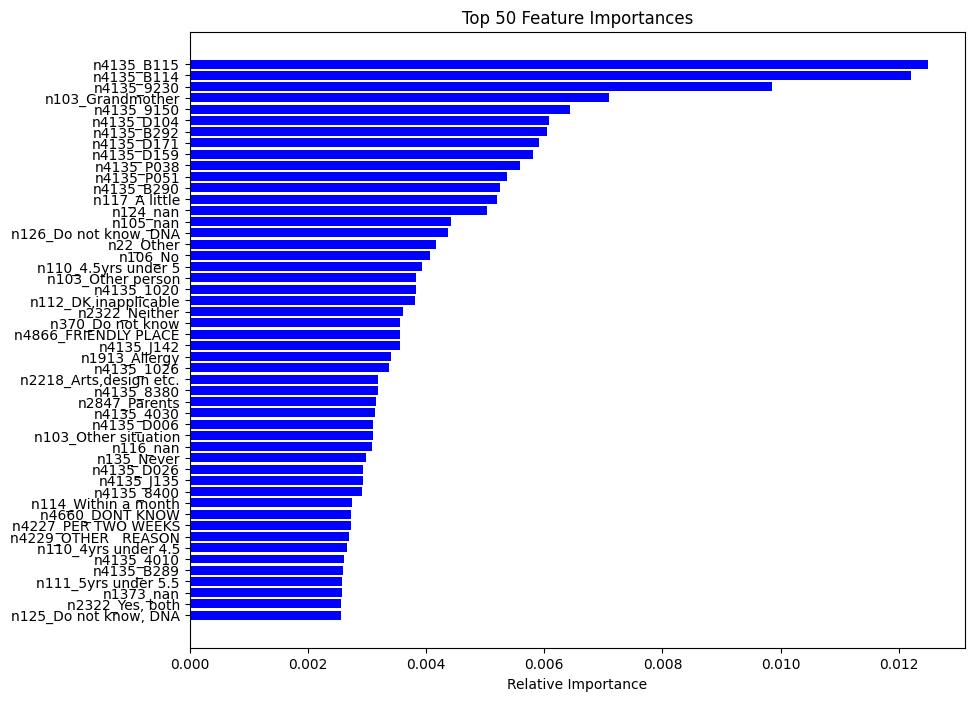

In [ ]:
#applies Random Forest Classifier model to the dataset and calculates the
#performance with multiple measurment methods such as confusion matrices

rfc = RandomForestClassifier(n_estimators=1000,random_state=31)

rfc.fit(X_train_oversampled, Y_train_oversampled)

rf_val_predictions = rfc.predict(X_val_imputed_df)
rf_test_predictions = rfc.predict(X_test_imputed_df)

rf_val_accuracy = accuracy_score(Y_val, rf_val_predictions)
rf_test_accuracy = accuracy_score(Y_test, rf_test_predictions)

rf_val_conf_matrix = confusion_matrix(Y_val, rf_val_predictions)
rf_test_conf_matrix = confusion_matrix(Y_test, rf_test_predictions)

confusion_matrices = {
    "Random Forest Validation": rf_val_conf_matrix,
    "Random Forest Test": rf_test_conf_matrix
}

for name, cm in confusion_matrices.items():
  TP = cm[1, 1]
  TN = cm[0, 0]
  FP = cm[0, 1]
  FN = cm[1, 0]
  Sensitivity = TP / (TP + FN)
  Specificity = TN / (TN + FP)
  Precision = TP / (TP + FP)
  F1_Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)
  print(f"\n{name}:")
  print("True Positives:", TP)
  print("True Negatives:", TN)
  print("False Positives:", FP)
  print("False Negatives:", FN)
  print("Sensitivity (Recall):", Sensitivity)
  print("Specificity:", Specificity)
  print("Precision:", Precision)
  print("F1 Score:", F1_Score)

print("\nValidation Data Accuracy:")
print(f"Random Forest: {rf_val_accuracy * 100:.2f}%")

print("\nTest Data Accuracy:")
print(f"Random Forest: {rf_test_accuracy * 100:.2f}%")

#gets the most important features
feature_importances = rfc.feature_importances_

#gets the indices of the top 50 features
indices = np.argsort(feature_importances)[-50:]

plt.figure(figsize=(10, 8))
plt.title('Top 50 Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_transformed_df.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<ipython-input-31-f413935fff06>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['0', '1'])
<ipython-input-31-f413935fff06>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['0', '1'])


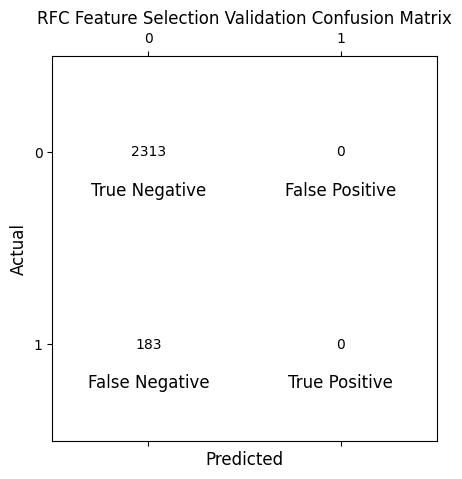

In [ ]:
#a function to plot the confusion matrix in seaborn
def plot_confusion_matrix(cm, title='Confusion Matrix'):
  fig, ax = plt.subplots(figsize=(6,5))
  cax = ax.matshow(cm, cmap='Greys', alpha=0)
  #adding the text labels
  for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    if i == j:
      if i == 0:
        ax.text(j, i+0.2, 'True Negative', ha='center', va='center', color='black', fontsize=12)
      else:
        ax.text(j, i+0.2, 'True Positive', ha='center', va='center', color='black', fontsize=12)
    else:
      if i == 0:
        ax.text(j, i+0.2, 'False Positive', ha='center', va='center', color='black', fontsize=12)
      else:
        ax.text(j, i+0.2, 'False Negative', ha='center', va='center', color='black', fontsize=12)
  ax.set_xticklabels(['']+['0', '1'])
  ax.set_yticklabels(['']+['0', '1'])
  plt.xlabel('Predicted', fontsize=12)
  plt.ylabel('Actual', fontsize=12)
  plt.title(title, fontsize=12)
  plt.show()

plot_confusion_matrix(rf_val_conf_matrix, 'RFC Feature Selection Validation Confusion Matrix')